In [100]:
# NAME: Shuhan Chen
# Github Username: ShuhanChen00
# USC ID: 8108685279

In [101]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
data, meta = arff.loadarff("../data/column_2C_weka.arff")
df = pd.DataFrame(data)
print(df.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis        class  
0      98.672917                 -0.254400  b'Abnormal'  
1     114.405425                  4.564259  b'Abnormal'  
2     105.985135                 -3.530317  b'Abnormal'  
3     101.868495                 11.211523  b'Abnormal'  
4     108.168725                  7.918501  b'Abnormal'  


In [103]:
print(df['class'].unique())

[b'Abnormal' b'Normal']


In [104]:
df['class'] = df['class'].replace({b'Normal': 0, b'Abnormal': 1})
print(df['class'].unique())

[1 0]


/var/folders/47/4f8_hwcx01n3qg9z91ss30400000gn/T/ipykernel_20754/3560412781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({b'Normal': 0, b'Abnormal': 1})


In [105]:
print(df.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  class  
0      98.672917                 -0.254400      1  
1     114.405425                  4.564259      1  
2     105.985135                 -3.530317      1  
3     101.868495                 11.211523      1  
4     108.168725                  7.918501      1  


(b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

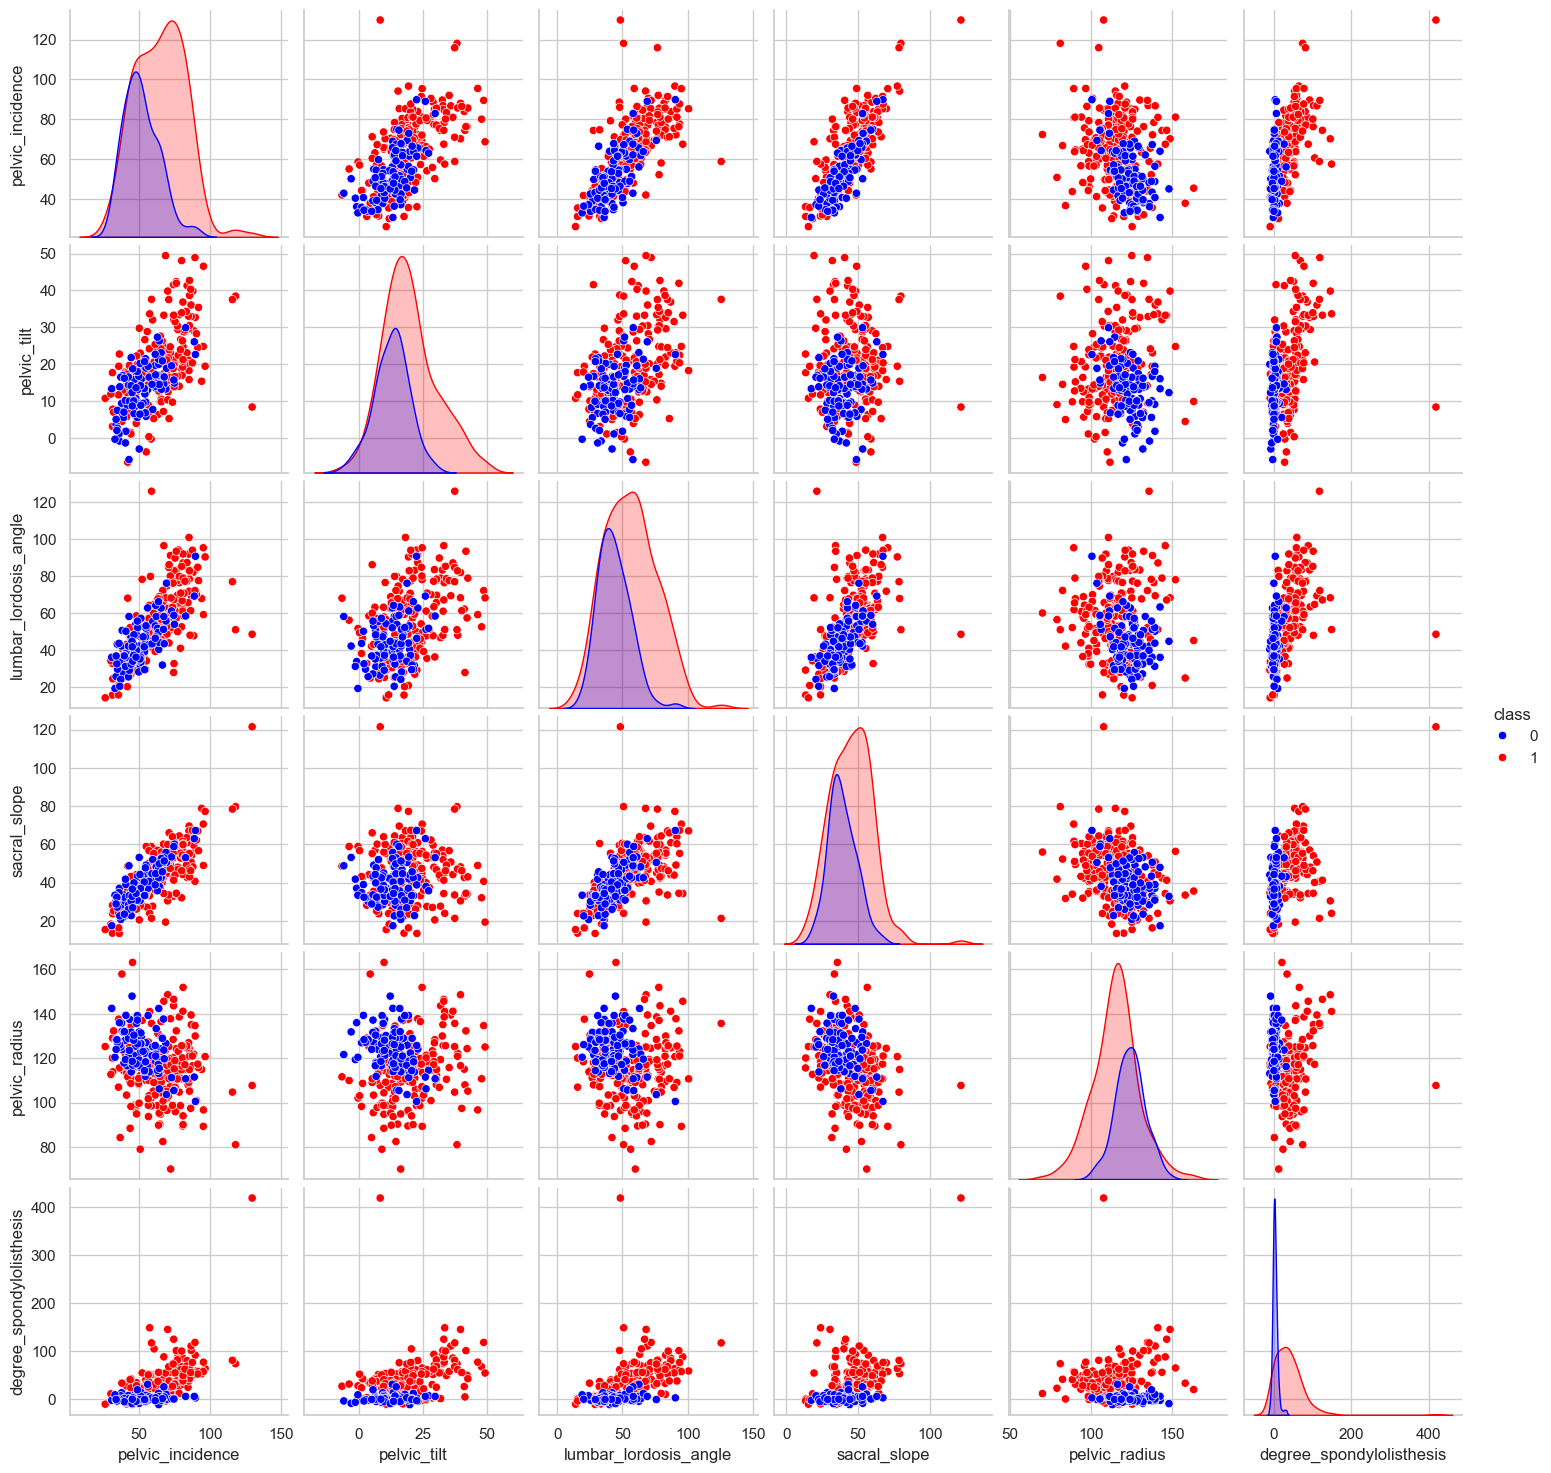

In [108]:
sns.set(style="whitegrid")
sns.pairplot(df, hue="class", palette={0: 'blue', 1: 'red'}, 
             vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                   'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'])
plt.show()

pelvic_incidence, pelvic_tilt, and lumbar_lordosis_angle seem to show clear separation between the two classes, meaning they might be good features for classification models.
degree_spondylolisthesis and sacral_slope show more overlap between the two classes, indicating that they might not be as strong discriminators.

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

/var/folders/47/4f8_hwcx01n3qg9z91ss30400000gn/T/ipykernel_20754/2997906344.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=var, data=df, palette={'0': 'blue', '1': 'red'})
/var/folders/47/4f8_hwcx01n3qg9z91ss30400000gn/T/ipykernel_20754/2997906344.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=var, data=df, palette={'0': 'blue', '1': 'red'})
/var/folders/47/4f8_hwcx01n3qg9z91ss30400000gn/T/ipykernel_20754/2997906344.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=var, data=df, palette={'0'

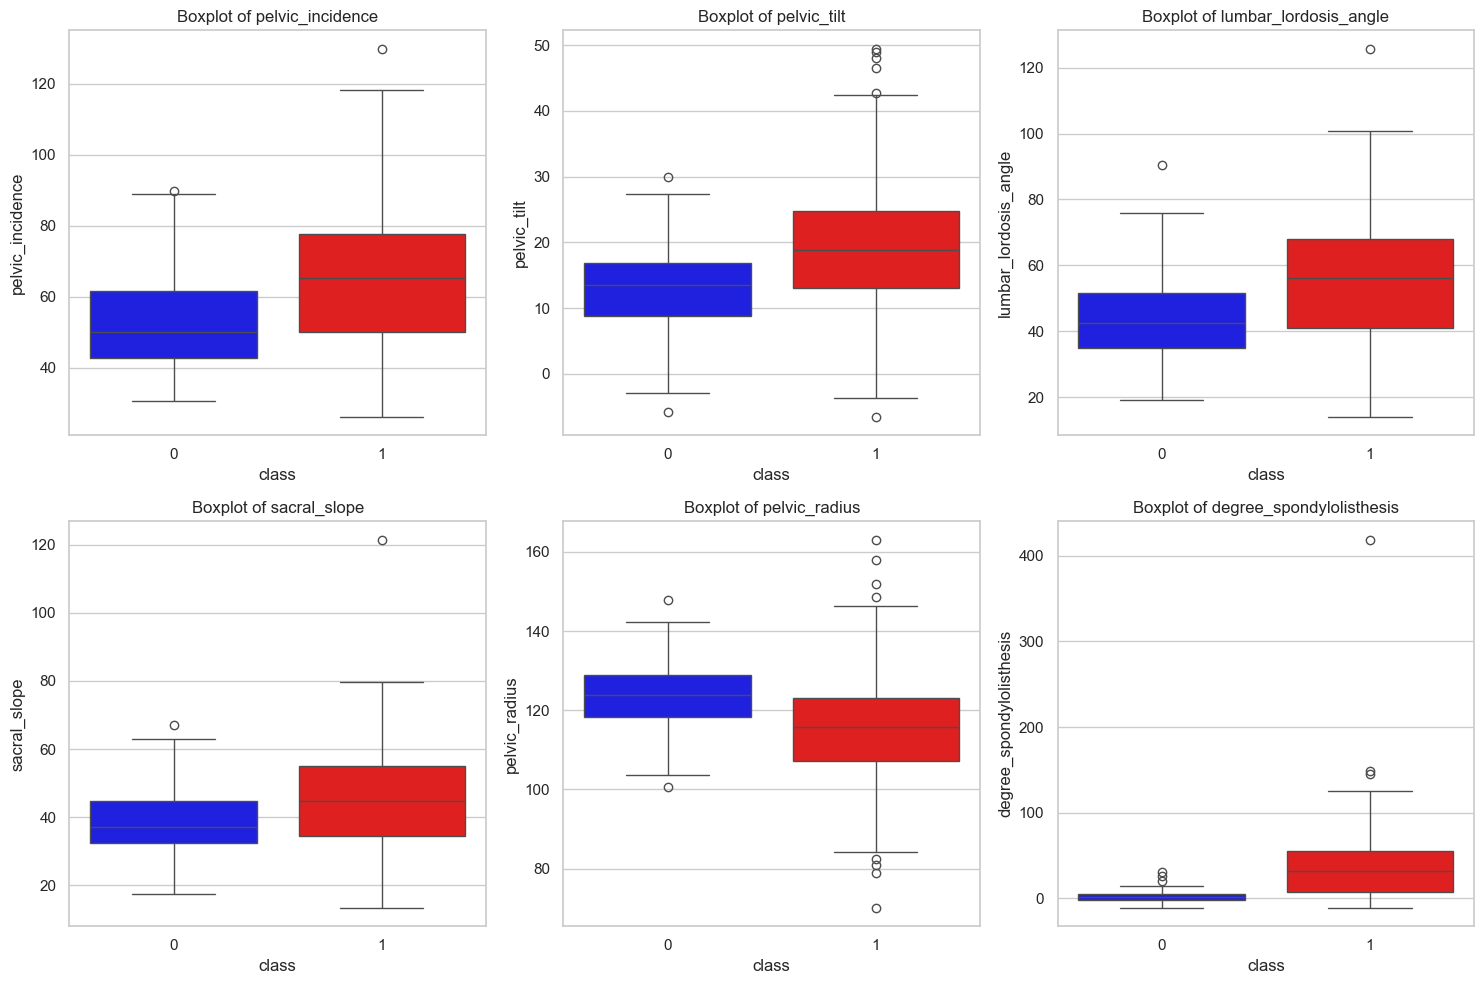

In [111]:
sns.set(style="whitegrid")
independent_vars = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                    'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
plt.figure(figsize=(15, 10))

for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(x="class", y=var, data=df, palette={'0': 'blue', '1': 'red'})
    plt.title(f'Boxplot of {var}')

plt.tight_layout() 
plt.show()

Variables like pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, pelvic_radius, and degree_spondylolisthesis have clear differences between the two classes. These are potentially strong features for distinguishing between Normal (0) and Abnormal (1).
Sacral_slope shows some overlap, meaning it might be a less effective feature for classification compared to the others.

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [114]:
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]

train_class_0 = class_0.head(70)
train_class_1 = class_1.head(140)

train_set = pd.concat([train_class_0, train_class_1])

test_class_0 = class_0.tail(len(class_0) - 70)
test_class_1 = class_1.tail(len(class_1) - 140)

test_set = pd.concat([test_class_0, test_class_1])

(c) Classification using KNN on Vertebral Column Data Set

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [118]:
X_train = train_set.drop('class', axis=1).values
y_train = train_set['class'].values
X_test = test_set.drop('class', axis=1).values
y_test = test_set['class'].values

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)#whether the test set should be scaled? 

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')#why using n_neighbors=3 can it be 5 or 7? how to choose the best/tuning?

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"Accuracy of k-NN with Euclidean metric: {accuracy_score(y_test, y_pred) * 100:.2f}%")

#Takeaways:
#fit_transform() is used to compute the mean and standard deviation from the training data and then apply the scaling to the training set.
#transform() is used to apply the same transformation to the test data based on the training data statistics (mean and standard deviation).

Accuracy of k-NN with Euclidean metric: 92.00%


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k.

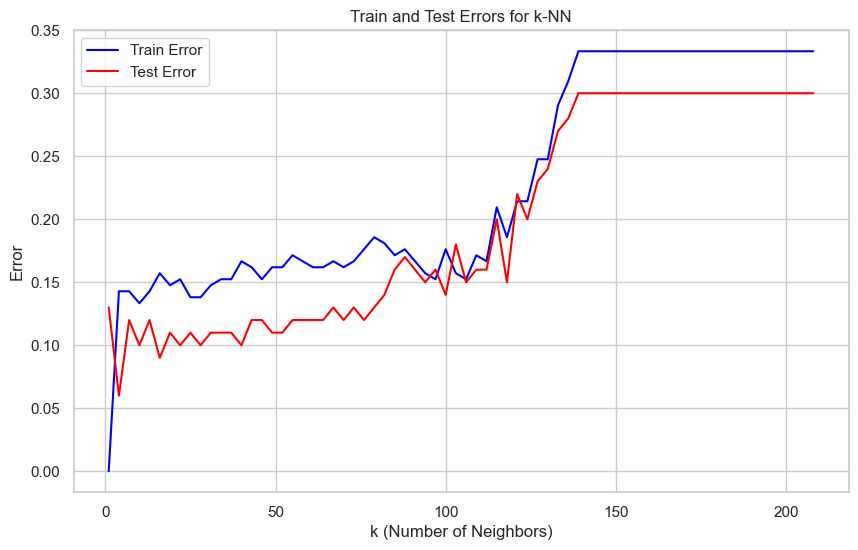

Best k*: 4
Best train error: 0


In [120]:
train_errors = []
test_errors = []
k_values = range(208, 0, -3)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', color='blue')
plt.plot(k_values, test_errors, label='Test Error', color='red')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Train and Test Errors for k-NN')
plt.legend()
plt.grid(True)
plt.show()

min_train_error = np.argmin(test_errors)
best_k = k_values[np.argmin(test_errors)]
print(f"Best k*: {best_k}")
print(f"Best train error: {np.argmin(min_train_error)}")

In [121]:
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

TPR = recall_score(y_test, y_pred, pos_label=1)
TNR = recall_score(y_test, y_pred, pos_label=0)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(conf_matrix)

print(f"True Positive Rate (TPR): {TPR}")
print(f"True Negative Rate (TNR): {TNR}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

[[25  5]
 [ 1 69]]
True Positive Rate (TPR): 0.9857142857142858
True Negative Rate (TNR): 0.8333333333333334
Precision: 0.9324324324324325
F1-score: 0.9583333333333334


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

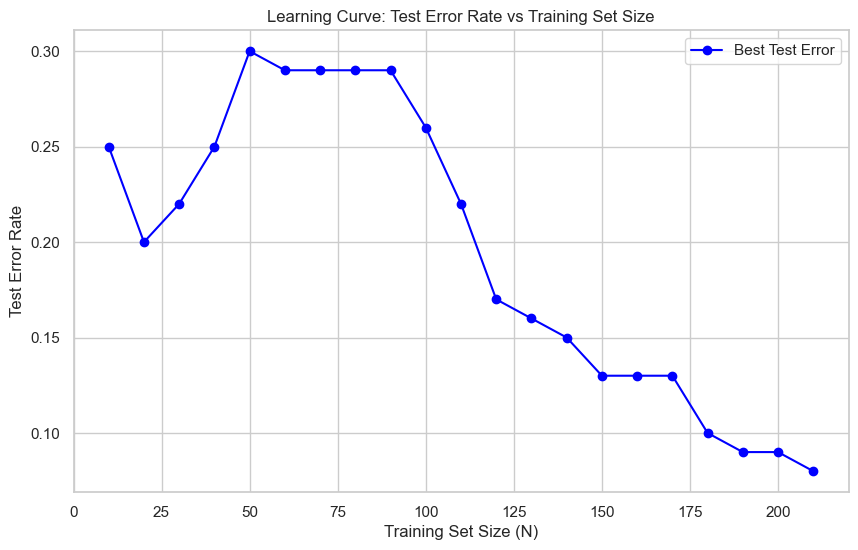

In [123]:
training_sizes = list(range(10, 211, 10))#?+1
best_test_errors = [] 

for N in training_sizes:
    train_class_0_subset = class_0[:N//3]
    train_class_1_subset = class_1[:N - N//3]

    train_set_subset = pd.concat([train_class_0_subset, train_class_1_subset])

    X_train_subset = train_set_subset.drop('class', axis=1).values
    y_train_subset = train_set_subset['class'].values

    k_values = list(range(1, min(197,len(X_train_subset)) + 1, 5))#?+1
    test_errors_for_k = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_subset, y_train_subset)
        y_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors_for_k.append(test_error)
    best_test_errors.append(min(test_errors_for_k))

                                
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, best_test_errors, label='Best Test Error', marker='o', color='blue')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Test Error Rate')
plt.title('Learning Curve: Test Error Rate vs Training Set Size')
plt.grid(True)
plt.legend()
plt.show()

#min(197,len(X_train_subset)) because the number of neighbors (`n_neighbors`) specified for the K-Nearest Neighbors (KNN) classifier is greater than the number of samples available in the training subset. 

(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.

In [126]:
k_values = list(range(1, 197, 5))
test_errors_for_k = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors_for_k.append(test_error)

test_errors_df = pd.DataFrame({'k': k_values, 'Test Error': test_errors_for_k})
print(test_errors_df)

best_k = k_values[np.argmin(test_errors_for_k)]
best_test_error = min(test_errors_for_k)
print(f"Best k: {best_k}, Test Error: {best_test_error:.8f}")

      k  Test Error
0     1        0.11
1     6        0.11
2    11        0.11
3    16        0.12
4    21        0.12
5    26        0.11
6    31        0.12
7    36        0.13
8    41        0.13
9    46        0.13
10   51        0.14
11   56        0.13
12   61        0.15
13   66        0.15
14   71        0.14
15   76        0.14
16   81        0.16
17   86        0.15
18   91        0.20
19   96        0.20
20  101        0.22
21  106        0.21
22  111        0.23
23  116        0.21
24  121        0.22
25  126        0.24
26  131        0.28
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30
Best k: 1, Test Error: 0.11000000


since k=1 has no statistical meaning, take k=6, test error = 0.11000000

B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [129]:
log_p_values = np.arange(0.1, 1.1, 0.1)
p_values = 10 ** log_p_values
best_k = 6
test_errors_for_p = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors_for_p.append(test_error)

test_errors_df_p = pd.DataFrame({'log10(p)': log_p_values, 'p': p_values, 'Test Error': test_errors_for_p})

best_p_index = np.argmin(test_errors_for_p)
best_log_p = log_p_values[best_p_index]
best_p = p_values[best_p_index]
best_test_error = test_errors_for_p[best_p_index]

print(test_errors_df_p)
print(f"Best log10(p): {best_log_p}, Best p: {best_p}, Best Test Error: {best_test_error:.4f}")

   log10(p)          p  Test Error
0       0.1   1.258925        0.09
1       0.2   1.584893        0.09
2       0.3   1.995262        0.08
3       0.4   2.511886        0.08
4       0.5   3.162278        0.08
5       0.6   3.981072        0.06
6       0.7   5.011872        0.07
7       0.8   6.309573        0.08
8       0.9   7.943282        0.09
9       1.0  10.000000        0.09
Best log10(p): 0.6000000000000001, Best p: 3.981071705534973, Best Test Error: 0.0600


C. which becomes Chebyshev Distance with p → ∞

In [131]:
import math
k_values = list(range(1, 197, 5))
test_errors_for_k_cheby = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=math.inf)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error_chebyshev = 1 - accuracy_score(y_test, y_pred)
    test_errors_for_k_cheby.append(test_error_chebyshev)

test_errors_df = pd.DataFrame({'k': k_values, 'Test Error': test_errors_for_k_cheby})
print(test_errors_df)

best_k = k_values[np.argmin(test_errors_for_k_cheby)]
best_test_error = min(test_errors_for_k_cheby)
print(f"Best k: {best_k}, Test Error: {best_test_error:.8f}")

      k  Test Error
0     1        0.13
1     6        0.10
2    11        0.12
3    16        0.08
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.10
8    41        0.13
9    46        0.12
10   51        0.12
11   56        0.12
12   61        0.14
13   66        0.13
14   71        0.14
15   76        0.11
16   81        0.14
17   86        0.12
18   91        0.15
19   96        0.14
20  101        0.19
21  106        0.18
22  111        0.18
23  116        0.18
24  121        0.21
25  126        0.21
26  131        0.25
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30
Best k: 16, Test Error: 0.08000000


ii. Mahalanobis Distance.

In [133]:
cov_matrix = np.cov(X_train.T)  
inv_cov_matrix = np.linalg.pinv(cov_matrix)
k_values = list(range(1, 197, 5))
test_errors_for_k_Mah = []

for k in k_values:
    knn_mahalanobis = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    knn_mahalanobis.fit(X_train, y_train)
    y_pred = knn_mahalanobis.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors_for_k_Mah.append(test_error)

test_errors_df = pd.DataFrame({'k': k_values, 'Test Error': test_errors_for_k_Mah})
print(test_errors_df)

best_k = k_values[np.argmin(test_errors_for_k_Mah)]
best_test_error = min(test_errors_for_k_Mah)
print(f"Best k: {best_k}, Test Error: {best_test_error:.8f}")

#Takeaways: difference between pinv and inv  inv is for square

      k  Test Error
0     1        0.15
1     6        0.16
2    11        0.18
3    16        0.17
4    21        0.20
5    26        0.17
6    31        0.21
7    36        0.21
8    41        0.19
9    46        0.22
10   51        0.21
11   56        0.21
12   61        0.23
13   66        0.21
14   71        0.22
15   76        0.21
16   81        0.24
17   86        0.21
18   91        0.24
19   96        0.24
20  101        0.24
21  106        0.23
22  111        0.25
23  116        0.26
24  121        0.29
25  126        0.29
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30
Best k: 1, Test Error: 0.15000000


since k=1 has no statistical meaning, whether should we take k=6?

(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

i. Euclidean Distance.

In [137]:
k_values = list(range(1, 197, 5)) 
test_errors_weighted = []

for k in k_values:
    knn_weighted = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn_weighted.fit(X_train, y_train)
    y_pred_weighted = knn_weighted.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_weighted)
    test_errors_weighted.append(test_error)

test_errors_df = pd.DataFrame({'k': k_values, 'Test Error': test_errors_weighted})

best_k_weighted = test_errors_df.loc[test_errors_df['Test Error'].idxmin(), 'k']
best_test_error = test_errors_df['Test Error'].min()

print(f"Best k with weighted voting: {best_k_weighted}")
print(f"Best test error with weighted voting: {best_test_error:.8f}")

Best k with weighted voting: 6
Best test error with weighted voting: 0.10000000


ii. Manhattan Distance.

In [139]:
k_values = list(range(1, 197, 5)) 
test_errors_weighted = []

for k in k_values:
    knn_weighted = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    knn_weighted.fit(X_train, y_train)
    y_pred_weighted = knn_weighted.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_weighted)
    test_errors_weighted.append(test_error)

test_errors_df = pd.DataFrame({'k': k_values, 'Test Error': test_errors_weighted})

best_k_weighted = test_errors_df.loc[test_errors_df['Test Error'].idxmin(), 'k']
best_test_error = test_errors_df['Test Error'].min()

print(f"Best k with weighted voting: {best_k_weighted}")
print(f"Best test error with weighted voting: {best_test_error:.8f}")

Best k with weighted voting: 26
Best test error with weighted voting: 0.10000000


iii. Chebyshev Distance.

In [141]:
k_values = list(range(1, 197, 5)) 
test_errors_weighted = []

for k in k_values:
    knn_weighted = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    knn_weighted.fit(X_train, y_train)
    y_pred_weighted = knn_weighted.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_weighted)
    test_errors_weighted.append(test_error)

test_errors_df = pd.DataFrame({'k': k_values, 'Test Error': test_errors_weighted})

best_k_weighted = test_errors_df.loc[test_errors_df['Test Error'].idxmin(), 'k']
best_test_error = test_errors_df['Test Error'].min()

print(f"Best k with weighted voting: {best_k_weighted}")
print(f"Best test error with weighted voting: {best_test_error:.8f}")

Best k with weighted voting: 16
Best test error with weighted voting: 0.11000000


(f) What is the lowest training error rate you achieved in this homework?

the lowest training error rate I chieved in the homework is 0. Tt happens when using knn when N number is extremely small, the training error rate becomes 0.